<h1 style="font-size:60px; 
           color:green;
           text-align:center">
    INGENIERÍA DE ATRIBUTOS Y SELECCIÓN DE VARIABLES</h1>

# Table of Contents

* [__Problematica 0__](#chapter1)
* [__Consigna 1__](#section_1)
* [__Librerias 2__](#section_2)
* [__Carga de datos 3__](#section_3)
* [__Creación del dataframe 4__](#section_4)
* [__Data wrangling 5__](#section_5)
    * [__Limpieza 5.1__](#section_5_1)
* [__Feature selection 6__](#section_6)
* [__Machine learning 7__](#section_7)
    * [__Preparación de datos 7.1__](#section_7_1)
    * [__Preparación del modelo 7.2__](#section_7_2)
        * [__Arbol de desiciones 7.2.1__](#section_7_2_1)
        * [__Regresion logistica 7.2.2__](#section_7_2_2)
        * [__Evaluación de modelos 7.3__](#section_7_3)   
* [__Observaciones 8__](#section_8)
* [__Futuras lineas 9__](#section_9)




---

# 0. Problematica 

Deberás entregar el duodécimo avance de tu proyecto final. Continuaremos hablando sobre lo trabajado en el desafío “Evaluando modelo de Machine Learning”. Crearás un notebook donde se terminará el proceso de Feature Engineering del desafío anterior, se busca que se puedan crear nuevas variables sintéticas que ayuden a mejorar el desempeño de los modelos de Machine Learning. Finalmente, deberás realizar un PCA sobre todas las variables utilizadas con el fin de determinar el peso relativo de cada variable en los modelos.

# 1. Consigna 

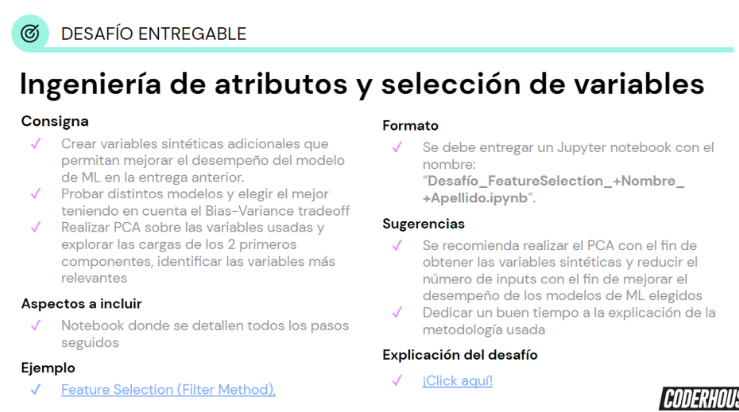

## Librerias 2

In [1]:
# Para trabajar los datos
import json
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os 

# Para eliminar los carteles warnings
import warnings as wn

# Para datos faltantes
import missingno as msno

# Importamos las librerias para realizar los graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importamos las librerias para machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Carga de datos 3

In [2]:
# Cargamos todos los dataframe desde los csv para trabajar de manera mas eficaz la promixa
information = pd.read_csv('data/information.csv')
maestrias_campeones = pd.read_csv('data/maestrias_campeones.csv')
informacion_campeones = pd.read_csv('data/informacion_campeones.csv')
id_partidas = (pd.read_csv('data/id_partidas.csv'))['lista'].tolist()
games_information = pd.read_csv('data/games_information.csv')
challenges_data = pd.read_csv('data/challenges_data.csv')
df_games = pd.read_csv('data/df_games.csv')

C:\Users\herne\AppData\Local\Temp\ipykernel_13108\2799268752.py:8: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games = pd.read_csv('data/df_games.csv')


## Creacion del dataframe 4

Creamos un funcion que nos devuelva los datos para un jugador en especifico.

In [3]:
######################################################################################
######################################################################################

# Definimos algunos datos que vamos a definir para trabajar
def historial_del_jugador(nombre_jugador:str)->pd.DataFrame:
    # Extraemos el id del jugador
    id_del_jugador = df_games[df_games['summonerName'] == nombre_jugador]['summonerId'].unique().item()
    
    # Ahora con el id nos quedamos unicamente con las partidas que deseamos
    historial_partidas = df_games[df_games['summonerId'] == id_del_jugador]
    
    return historial_partidas

######################################################################################
######################################################################################

In [4]:
games_from_GCDariusBrando = df_games[df_games['summonerId'] == 'K2twAA5gA-gMXY4YVq0szKaX-er9Hlhz8sitMu4lzN00Qw']
# games_from_GCDariusBrando.to_csv('testeo.csv', index=False)

In [5]:
games_from_GCDariusBrando.head()

,index,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,...,killAfterHiddenWithAlly,killedChampTookFullTeamDamageSurvived,knockEnemyIntoTeamAndKill,pickKillWithAlly,saveAllyFromDeath,survivedThreeImmobilizesInFight,tookLargeDamageSurvived,takedownsFirstXMinutes,killingSprees_y,playedChampSelectPosition
5,5,8,0,0,12785,14,36,DrMundo,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0,8,0,1,13323,15,122,Darius,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,5,11,0,4,12193,14,36,DrMundo,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,5,11,0,2,15230,16,36,DrMundo,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0,3,0,0,9350,12,36,DrMundo,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Data wrangling 

## Limpieza 5.1

In [6]:
# Contemos la cantidad de valores nulos que poseemos en algunas columnas

columnas = ['riotIdName','riotIdTagline','inhibitorTakedowns','basicPings','allInPings','abilityUses']

for columna in columnas:
    
    # Vemos el listado de columnas y nos diga la cantidad de nulos
    print(f'La cantidad de filas nulas en la columna {columna} es de un total de', df_games[columna].isnull().sum())

La cantidad de filas nulas en la columna riotIdName es de un total de 7220
La cantidad de filas nulas en la columna riotIdTagline es de un total de 7220
La cantidad de filas nulas en la columna inhibitorTakedowns es de un total de 120
La cantidad de filas nulas en la columna basicPings es de un total de 5360
La cantidad de filas nulas en la columna allInPings es de un total de 5690
La cantidad de filas nulas en la columna abilityUses es de un total de 4690


Dada la cantidad de valores nulos que tenemos podemos optar por los siguientes procesos. Como la mayoria de valores nulos exeden el 50% de la muestra, lo mejor que podremos hacer para estos casos es eliminar las columna del analisis. Esto se debe a que el historial de datos que estamos tomando es muy antiguo por lo que los datos que se van almacenando varias. Si deseamos realziar el mismo analisis pero con lapsos de tiempo mas corto, tranquilamente podriammos tomar el historial de una cantidad de partidas X con el cual podriamos trabajar de otra manera estos valores. En el caso de la columna _inhibitorTakedowns_ reemplazaremos los valores nulos con un 0 unicamente al ser un porcentaje chico de la muestra

106
playedChampSelectPosition
Se finalizo el proceso de limpieza


<Axes: >

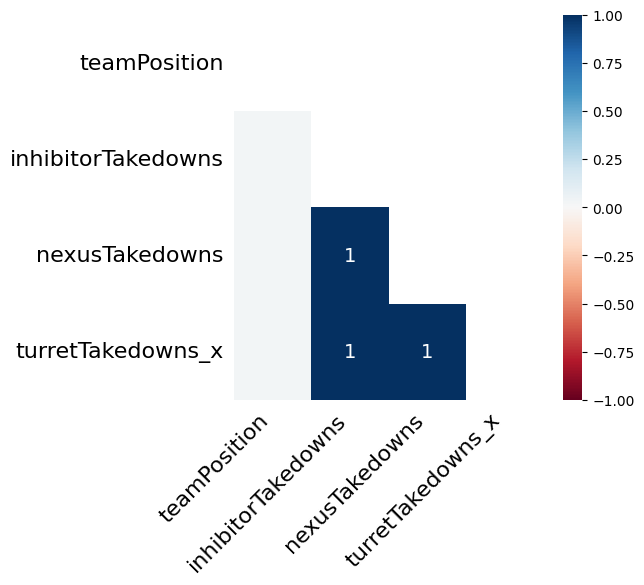

In [7]:
# vemos desde que columna hasta cual hay que eliminar
print(df_games.columns.get_loc('eligibleForProgression'))
print(df_games.columns[250])

# Eliminamos las columnas de mayor cantidad
df_games.drop(df_games.columns[106:251], axis=1, inplace=True)

# Eliminamos las columnas que estan completamente vacias
df_games.drop(columns=['riotIdName', 'riotIdTagline'], inplace=True)

# Rellenamos las columnas que nos quedan con valores igual a 0
df_games.fillna(0)

print('Se finalizo el proceso de limpieza')

Como podemos observar siguen quedando datos nulos en aquellas columnas en donde tengamos un valor igual a 1.

Veamos un poco sobre estas mismas y veamos que tantos valores nos quedan asi vemos como los podemos trabajar.

In [8]:
# Calculamos el promedio de cada una de estas columnas
# Selecionamos las columnas a trabajar
columns = ['inhibitorTakedowns','nexusTakedowns', 'turretTakedowns_x']

# Realizamos el bucle para estas columnas
for col in columns:
    
    # Calculamos el promedio de la col
    prom_col = round(df_games[col].mean(), 0)
    
    # Reemplazamos los NaN con estos valores
    df_games[col].fillna(prom_col, inplace=True)
    
print("Perfect: Se finalizaso el proceso de reemplazo de nulos!")

Perfect: Se finalizaso el proceso de reemplazo de nulos!


# 6. Feature selection 

## Encoding de variables & limpieza

Para este segundo criterio de selección de los datos, emplearemos el razonamiento que pudimos intuir del EDA realizado en pasos anteriores.

In [11]:
# # Seleccionamos las las variables mas importantes en este segundo modelo
# variables2 = ['assists', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'deaths', 'dragonKills',
#            'firstBloodKill', 'goldEarned', 'kills', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
#            'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore', 'win']

# # Nos quedamos con las variables más importantes y las definimos en un df train 
# # df_for_testing = df_games[variables]
# games_from_GCDariusBrando = historial_del_jugador('GC LDCGOD')
# df_for_testing = games_from_GCDariusBrando[variables2]

# # Hay que hacer el encoding de 4 variables
# # Definimos el modelo
# le = preprocessing.LabelEncoder()

# # Realizamos el encoding
# columnas = ['firstBloodKill', 'firstTowerKill', 'teamPosition', 'win']
# for columna in columnas:
    
#     # Empleamos el modelo
#     le.fit(df_for_testing[columna]) 
#     list(le.classes_)

#     # transformamos las variables
#     df_for_testing[columna] = le.transform(df_for_testing[columna])
#     # list(le.inverse_transform(df_for_testing['teamPosition']))    
    
#     wn.filterwarnings('ignore')
    
#     # wn.filterwarnings('ignore')

C:\Users\herne\AppData\Local\Temp\ipykernel_4044\2404916113.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_testing[columna] = le.transform(df_for_testing[columna])


Crearemos un tercer modelo de variables en el que incluiremos variables que calculemos previamente

In [46]:
# Reemplazamos las partidas en donde murieron 0 veces po un 1
df_games['deaths'] = df_games['deaths'] + 1

# Crearemos las columans extras para el analisis que agregan valor
df_games['kda'] = (df_games['kills'] + df_games['assists'])/df_games['deaths']

# Creamos la segunda columna de interes
df_games['farm_min'] = df_games['totalMinionsKilled']/(df_games['timePlayed']/60)

# Seleccionamos las las variables mas importantes en este tercer modelo
variables3 = ['kda', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'farm_min', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore', 'win']


# Nos quedamos con las variables más importantes y las definimos en un df train 
# df_for_testing = df_games[variables]
games_from_GCDariusBrando = historial_del_jugador('GC LDCGOD')
df_for_testing = games_from_GCDariusBrando[variables3]

# Hay que hacer el encoding de 4 variables
# Definimos el modelo
le = preprocessing.LabelEncoder()

# Realizamos el encoding
columnas = ['firstBloodKill', 'firstTowerKill', 'teamPosition', 'win']
for columna in columnas:
    
    # Empleamos el modelo
    le.fit(df_for_testing[columna]) 
    list(le.classes_)

    # transformamos las variables
    df_for_testing[columna] = le.transform(df_for_testing[columna])
    # list(le.inverse_transform(df_for_testing['teamPosition']))    
    
    wn.filterwarnings('ignore')
    
    # wn.filterwarnings('ignore')

In [48]:
# for i in df_for_testing.columns:
    
#     print(f"Para la col", i, "hay ", df_for_testing[i].isna().value_counts())

# 7. Machine learning 

## Preparacion de datos 7.1

In [61]:
# Definimos las columnas que seran el x e y
y_cols = ['win']

# Definimos el segundo modelo para x
x_cols2 = ['assists', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'deaths', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'kills', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore']


# Definimos el cuarto modelo para x
x_cols3 = ['kda', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'farm_min', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore']


# Definimos las variables x y las y 
Y = df_for_testing[y_cols]
X = df_for_testing[x_cols3]

# Definimos los datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.35, ## Definimos el tamaño de los datos que vamos a emplear
                                                    random_state = 50)


## Preparación del modelo 7.2

### Arbol de desiciones 7.2.1

In [50]:
# Importamos las librerias necesarias para dicho analisis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [58]:
# Creamos una isntancia de arbol de desiciones
clf = DecisionTreeClassifier(max_depth=3,
                             random_state=20)
clf.fit(x_train, y_train)

# Realizamos un testeo de como resultan los datos
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

# Evaluamos la presicion del modelo sobre los valores de entrenamiento
accuracy = accuracy_score(y_train, y_train_pred)
print(f'La presición del modelo sobre los datos de entrenamiento es: {accuracy}')

# Evaluacmos la presicion del modelo sobre los valores de testeo
accuracy = accuracy_score(y_test, y_pred)
print(f'La presición del modelo sobre los datos de testeo es: {accuracy}')

La presición del modelo sobre los datos de entrenamiento es: 0.8353552859618717
La presición del modelo sobre los datos de testeo es: 0.8137931034482758


[Text(0.5, 0.875, 'x[0] <= 2.155\ngini = 0.5\nsamples = 577\nvalue = [291, 286]'),
 Text(0.25, 0.625, 'x[3] <= 3344.5\ngini = 0.385\nsamples = 353\nvalue = [261, 92]'),
 Text(0.125, 0.375, 'x[13] <= 215.5\ngini = 0.221\nsamples = 245\nvalue = [214, 31]'),
 Text(0.0625, 0.125, 'gini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.1875, 0.125, 'gini = 0.165\nsamples = 231\nvalue = [210, 21]'),
 Text(0.375, 0.375, 'x[4] <= 23474.5\ngini = 0.492\nsamples = 108\nvalue = [47, 61]'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 91\nvalue = [47, 44]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.75, 0.625, 'x[0] <= 3.464\ngini = 0.232\nsamples = 224\nvalue = [30, 194]'),
 Text(0.625, 0.375, 'x[3] <= 1223.5\ngini = 0.37\nsamples = 106\nvalue = [26, 80]'),
 Text(0.5625, 0.125, 'gini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.6875, 0.125, 'gini = 0.285\nsamples = 87\nvalue = [15, 72]'),
 Text(0.875, 0.375, 'x[5] <= 9.077\ngini = 0.065\nsamples = 118\nvalue

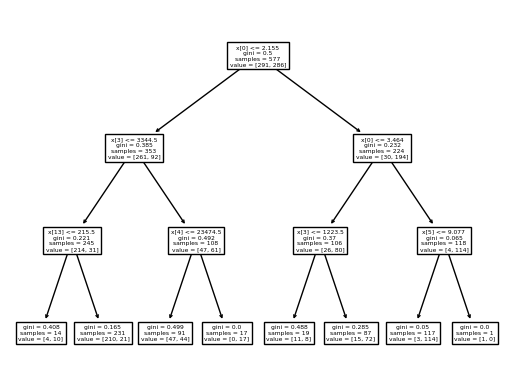

In [59]:
tree.plot_tree(clf)

### Posible solucion de overfitting

Una posible solucion para el overfittig pude ser de lo mas basico:
- Aumentar la cantidad de muestras
- Eliminar columnas

Para esto, lo que deberemos de hacer a su vez es un criterio mas selectivo de las variables que estamos empleando para el analisis. Deberemos de ver:
- Que no tengamos sesgos
- Las variables que estamos tomando
- Que no sea un level por ejemplo que es algo que antes de la partida uno no sabe
- Si los campeones estan balanceados

### Regresion logistica 7.2.2

In [53]:
# Librerias para este modelo
from sklearn.linear_model import LinearRegression, LogisticRegression

In [62]:
# Definimos la funcion
clf = LogisticRegression(solver='sag',
                         penalty='l2',
                         multi_class='ovr')
clf.fit(x_train, y_train)

# Definimos el valor de prediccion
y_train_pred = clf.predict(x_train)
y_pred = clf.predict(x_test)

# Evaluamos la presicion del modelo sobre los valores de entrenamiento
accuracy = accuracy_score(y_train, y_train_pred)
print(f'La presición del modelo sobre los datos de entrenamiento es: {accuracy}')

# Evaluacmos la presicion del modelo sobre los valores de testeo
accuracy = accuracy_score(y_test, y_pred)
print(f'La presición del modelo sobre los datos de testeo es: {accuracy}')

wn.filterwarnings('ignore')

### Primer modelo (primera eleccion de variables) iaccurancy = 93,77%
### Segundo modelo (segunda eleccion de variables) accurancy = 0.871 | 0.829
### Tercer modelo (cambio del modelo de "solver" del algoritmo) accurancy = 0.770 | 0.778
### Cuarto modelo (cambio de variables y muestra testing) accurancy = 0.763 | 0.778

La presición del modelo sobre los datos de entrenamiento es: 0.7633262260127932
La presición del modelo sobre los datos de testeo es: 0.7786561264822134


## Evaluación de modelos 7.3

### Cuarto modelo

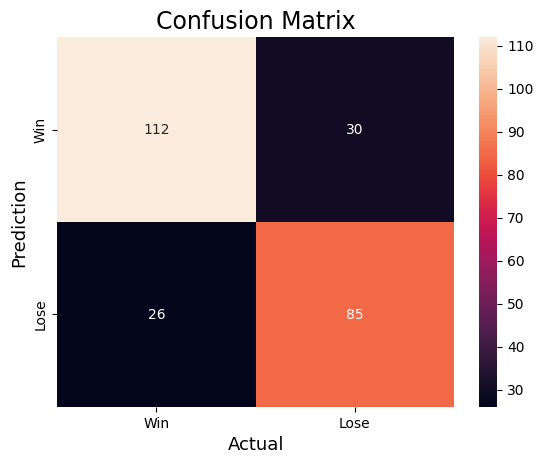

El accuracy del modelo es de:  0.7786561264822134
La precision del modelo es de:  0.7741935483870968
El recall del modelo es de:  0.8275862068965517


In [63]:
# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Win', 'Lose'],
            yticklabels=['Win', 'Lose'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Calculamos las distintas metricas que tenemos para medir el rendimiento de nuestra matriz
# El accurancy
accuracy = accuracy_score(y_test, y_pred)
print("El accuracy del modelo es de: ", accuracy)

# La precision
precision = (96/(96+28))
print("La precision del modelo es de: ", precision)

# El recall
recall = (96/(96+20))
print("El recall del modelo es de: ", recall)

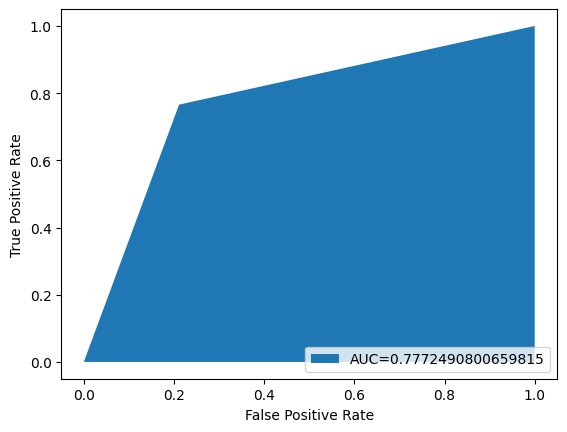

In [64]:
# Imporatamos la libreria
from sklearn import metrics

# Definimos los valores
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.fill_between(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# 8. Observaciones

### Evaluacion modelos de Machine Learning



En el primer modelo que realizamos se nos presento un problema de overfitting para el modelo, entonces los valores que nos devolvia la verdad que no eran de mucha ayuda. ¿Como encaramos esta problematica? Al principio los datos se conseguian de un mapa de correlacion, en este segundo intento se obtuvieron en base al EDA que se realizo en trabajos anteriores. Gracias a esto pudimos realizar un analisis muchisimo más rico. Pudimos observar gracias a la matriz de relacion que cantidad de aciertos y errores tiene nuestro modelos. En base a lo que vemos en la imagen del punto _7.3 con el segundo modelo_ nuestro modelo predice bien 169 partidas de un total de 217. Entre estas últimas, vemos que predijo correctamente 96 victorias y 73 derrotas ... bastante bien. Junto con esto obtuvimos que el _accurancy_, que es la cantidad de aciertos sobre la cantidad total de partidas, ronda el 77% por lo que el modelo es bastante preciso y no llega a tener un overfitting.

Si bajamos la cantidad de variables, ¿Mejorara el modelo? Para responder a esta pregunta decidimos realizar un tercer grupo de variables en donde lo que hicimos fue reducir la cantidad de variables del grupo 2. Lo que obtuvimos fue un modelo que tenia un _accurancy_ del 69%, en el mismo de las 196 partidas, predijo correctamente 90 victorias y 60 derrotas. ¿Mejoro el modelo? En base a las observaciones que hicimos no esta del todo definido si vale o no la pena la reduccion de las variables, pareciera que el modelo ideal es el desarrollado en el segundo grupo, el cual tiene un mayor _accurancy_.

¿Qué otro valor podemos usar para medir el rendimiento de nuestros modelos? En base a lo visto a la cursada tenemos tambien la _Curva ROC_ que lo que hace es medir el rendimiento del modelo de clasificaicon en dif valores de umbral. La forma de interpretar el mismo es que a mayor area por debajo de la linea mayor sera el rendimiento del modelo por lo que sera mejor. Como podemos ver en ambos graficos el rendimiento del modelo 2 es mayor al del modelos 3 en base al area bajo la curva. Vemos que el M2 posee un AUC=0,78 mientras que el M3 posee un AUC=0,68. En base a este otro factor, concluimos que el M2 es mejor que el propuesto en el M3 para reducir todavia más el oferfitting, dandonos a entender que el M2 ya es un modelo optimo el cual no vale la pena seguir reduciendo variables. 

# 9. Futuras lineas

_Pasos o procesos que faltan realzar en el proyecto y se iran trabajando durante las fechas proximas_

- Investigacion de variables claves
- Desarrollo del dataframe con las nuevas variables (estas se conseguiran del mismo que tenemos actualmente)
- Desarrollo de matrices de relacion para los nuevos modelos